In [1]:
##utilizando a base de dados do inpe, vamos realizar algumas análises sobre queimadas
## https://queimadas.dgi.inpe.br/~rqueimadas/documentos/
#1 - série histórica do ano de 2022, quais meses de maiores focos
#2 - áreas mais afetadas 
#3 - análise dos fatores ambientais, como precipitação e dias sem chuva


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f'Focos_2022-01-01_2023-01-01.csv')
df.head(10)


,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,28.0,0.0,1.0,-7.45158,-44.46713,2.2
1,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,27.0,0.0,1.0,-7.45103,-44.47060,2.6
2,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,59.0,0.0,1.0,-7.44864,-44.39903,1.8
3,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,59.0,0.0,1.0,-7.44533,-44.39851,1.2
4,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,75.0,0.0,1.0,-7.43312,-44.82275,2.6
5,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,SEBASTIAO LEAL,Cerrado,89.0,0.0,1.0,-7.35500,-44.28152,1.5
6,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,28.0,0.0,1.0,-7.24448,-44.48819,2.2
7,2022/09/11 04:19:00,NOAA-20,Brasil,MARANHAO,BENEDITO LEITE,Cerrado,79.0,0.0,1.0,-7.26667,-44.65174,3.4
8,2022/09/11 04:19:00,NOAA-20,Brasil,MARANHAO,SAO FELIX DE BALSAS,Cerrado,81.0,0.0,1.0,-7.21225,-44.84483,3.9
9,2022/09/11 04:19:00,NOAA-20,Brasil,MARANHAO,SAO FELIX DE BALSAS,Cerrado,78.0,0.0,1.0,-7.20840,-44.84777,3.9


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462901 entries, 0 to 1462900
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   datahora      1462901 non-null  object 
 1   satelite      1462901 non-null  object 
 2   pais          1462901 non-null  object 
 3   estado        1462901 non-null  object 
 4   municipio     1462901 non-null  object 
 5   bioma         1462901 non-null  object 
 6   diasemchuva   1417819 non-null  float64
 7   precipitacao  1417819 non-null  float64
 8   riscofogo     1417819 non-null  float64
 9   latitude      1462901 non-null  float64
 10  longitude     1462901 non-null  float64
 11  frp           1257010 non-null  float64
dtypes: float64(6), object(6)
memory usage: 133.9+ MB
None


### 1. Análise temporal

In [41]:
df_date = pd.DataFrame(data=df, columns=['datahora'])

In [6]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462901 entries, 0 to 1462900
Data columns (total 1 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   datahora  1462901 non-null  object
dtypes: object(1)
memory usage: 11.2+ MB


In [7]:
#criar colunas de dia, mes e hora
datas = pd.DatetimeIndex(df_date['datahora'])
datas

DatetimeIndex(['2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               ...
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00',
               '2022-09-11 04:19:00', '2022-09-11 04:19:00'],
              dtype='datetime64[ns]', name='datahora', length=1462901, freq=None)

In [8]:
df_date['mes']=datas.month
df_date['dia']=datas.day
df_date['ano']=datas.year
df_date['hora']=datas.hour

In [9]:
df_date.value_counts(['ano'])
#excluir os dados de 2023

ano 
2022    1462667
2023        234
dtype: int64

In [10]:
df_date.drop(df_date.query('ano==2023').index, inplace=True)

In [11]:
df_date.value_counts(['ano'], ascending=False)


ano 
2022    1462667
dtype: int64

In [12]:
#horario com maiores ocorrências de incêndio
horario = df_date.value_counts(['hora'], ascending=False)


In [13]:
horario = horario.to_frame(name = 'contagem')
horario.head()

,contagem
hora,
16,387525
17,223083
4,189190
15,78926
13,61789


In [14]:
horario.reset_index(inplace=True)
horario

,hora,contagem
0,16,387525
1,17,223083
2,4,189190
3,15,78926
4,13,61789
5,3,57820
6,19,56285
7,18,51906
8,14,50312
9,20,49342


<AxesSubplot:title={'center':'Focos por horário'}, xlabel='Horário', ylabel='Número de Focos'>

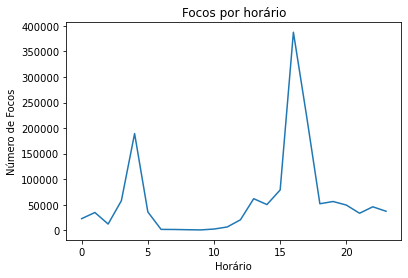

In [15]:
fig= sns.lineplot(data=horario, x='hora', y='contagem')
fig.set_xlabel("Horário")
fig.set_ylabel("Número de Focos")
fig.set(title='Focos por horário')


fig

In [16]:
pormes = df_date.value_counts(['mes'], ascending=False)


In [17]:
type(pormes)

pandas.core.series.Series

In [18]:
pormes = pormes.to_frame(name='contagem')

In [19]:
pormes.reset_index(inplace=True)

Aqui o gráfico que representa o numero de ocorrencias por mes, os meses de setembro e outrubro tem um aumento consideravel, 
mesmo em comparação com agosto, que é o mes com maior numero de ocorrências além deles. 

[Text(0.5, 1.0, 'Ocorrencia por mês')]

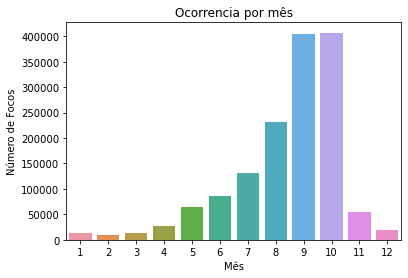

In [20]:
fig2 = sns.barplot(data=pormes, x='mes', y='contagem')
fig2.set_xlabel('Mês')
fig2.set_ylabel('Número de Focos')
fig2.set(title='Ocorrencia por mês')

### 2. Análise de área

In [22]:
df_estados = df.value_counts(['estado'])


In [23]:
df_estados.head

<bound method NDFrame.head of estado            
MARANHAO              363202
TOCANTINS             322682
MATO GROSSO           206291
BAHIA                 163680
PIAUI                 149079
GOIAS                 123283
MINAS GERAIS           86019
MATO GROSSO DO SUL     24939
SAO PAULO              17752
DISTRITO FEDERAL        5741
PARANA                   188
RONDONIA                  45
dtype: int64>

In [24]:
df_municipio = df.value_counts(['municipio'])
df_municipio

municipio                 
BALSAS                        26756
MIRADOR                       22770
PIUM                          20795
ALTO PARNAIBA                 19539
SAO DESIDERIO                 19294
                              ...  
PAULISTANIA                       1
OLEO                              1
NHANDEARA                         1
ANGELICA                          1
SAO SEBASTIAO DO RIO PRETO        1
Length: 1319, dtype: int64

aqui estão os lideres de municipio e estado. como sera a relação dos dois? 

In [25]:
dflocais = df[['municipio', 'estado']]


In [26]:
dflocaiscontag = dflocais.value_counts()

In [27]:
dflocaiscontag = dflocaiscontag.sort_values(ascending=False)

Aqui a análise de municipios, o estado do maranhao que está em primeiro na contagem de estados também tem alguns dos 10 primeiros municipios com o maior numero de ocorrencias. 

In [28]:
dflocaiscontag.head(10)

municipio                estado     
BALSAS                   MARANHAO       26756
MIRADOR                  MARANHAO       22770
PIUM                     TOCANTINS      20795
ALTO PARNAIBA            MARANHAO       19539
SAO DESIDERIO            BAHIA          19294
RIBEIRAO CASCALHEIRA     MATO GROSSO    17288
FORMOSO DO ARAGUAIA      TOCANTINS      16918
FORMOSA DO RIO PRETO     BAHIA          16012
BAIXA GRANDE DO RIBEIRO  PIAUI          15113
URUCUI                   PIAUI          15099
dtype: int64

### 3. Análise de alguns fatores ambientais

In [29]:
df[df['diasemchuva'].isnull()]

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
116418,2022/09/06 15:16:34,GOES-16,Brasil,MATO GROSSO,GENERAL CARNEIRO,Cerrado,NaN,NaN,NaN,-15.7070,-53.1325,119.3
116419,2022/09/06 15:16:06,GOES-16,Brasil,TOCANTINS,PONTE ALTA DO TOCANTINS,Cerrado,NaN,NaN,NaN,-10.6968,-47.4508,70.1
116420,2022/09/06 15:16:02,GOES-16,Brasil,MARANHAO,ALTO PARNAIBA,Cerrado,NaN,NaN,NaN,-9.9555,-46.2876,87.6
116421,2022/09/06 15:16:07,GOES-16,Brasil,TOCANTINS,PONTE ALTA DO TOCANTINS,Cerrado,NaN,NaN,NaN,-10.8096,-47.5259,67.5
116422,2022/09/06 15:16:33,GOES-16,Brasil,MATO GROSSO,POXOREU,Cerrado,NaN,NaN,NaN,-15.3654,-53.7887,104.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1128196,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6900,-46.5200,NaN
1128197,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6800,-46.5400,NaN
1128198,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6700,-46.5600,NaN
1128199,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6500,-46.5200,NaN


In [30]:
#retirar valores que apresentam erro

df.drop(df.query('diasemchuva == -999').index, inplace=True)

In [31]:
print('min', df['diasemchuva'].min())
print('max', df['diasemchuva'].max())

min 0.0
max 359.0


In [32]:
print('minrisco', df['riscofogo'].min())
print('maxrisco', df['riscofogo'].max())

minrisco -999.0
maxrisco 1.0


In [33]:
df.query('riscofogo == -999')

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
188,2022/09/11 04:23:00,NOAA-20,Brasil,MINAS GERAIS,PASSOS,Cerrado,14.0,0.0,-999.0,-20.69250,-46.62272,0.4
208,2022/09/11 04:23:00,NOAA-20,Brasil,SAO PAULO,GUARA,Cerrado,5.0,0.0,-999.0,-20.44469,-47.84324,1.0
227,2022/09/11 04:23:00,NOAA-20,Brasil,SAO PAULO,SAO SIMAO,Cerrado,4.0,0.0,-999.0,-21.47584,-47.56092,0.5
350,2022/09/11 04:23:00,NOAA-20,Brasil,SAO PAULO,BATATAIS,Cerrado,3.0,0.0,-999.0,-20.90745,-47.57496,1.8
827,2022/09/11 04:21:00,NOAA-20,Brasil,MATO GROSSO,PARANATINGA,Cerrado,107.0,0.0,-999.0,-14.36400,-53.56885,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1462258,2022/09/11 04:19:00,NOAA-20,Brasil,TOCANTINS,NOVO JARDIM,Cerrado,119.0,0.0,-999.0,-11.81797,-46.78116,1.3
1462442,2022/09/11 04:21:00,NOAA-20,Brasil,DISTRITO FEDERAL,BRASILIA,Cerrado,88.0,0.0,-999.0,-15.85961,-48.12550,0.7
1462477,2022/09/11 04:23:00,NOAA-20,Brasil,MINAS GERAIS,AGUA COMPRIDA,Cerrado,5.0,0.0,-999.0,-20.07973,-48.17558,4.0
1462482,2022/09/11 04:23:00,NOAA-20,Brasil,SAO PAULO,MACATUBA,Cerrado,4.0,0.0,-999.0,-22.54008,-48.81319,1.3


In [34]:
df.drop(df.query('riscofogo == -999').index, inplace=True)

In [35]:
print('chuvamin', df['precipitacao'].min())
print('chuvamax', df['precipitacao'].max())

chuvamin 0.0
chuvamax 126.33


In [36]:
chuvas = df['precipitacao'].sort_values(ascending=False)
chuvas

723950     126.33
657753     109.98
158206     106.76
158207     104.06
635549     102.39
            ...  
1128196       NaN
1128197       NaN
1128198       NaN
1128199       NaN
1128200       NaN
Name: precipitacao, Length: 1441793, dtype: float64

In [37]:
df[df['precipitacao'].isnull()]

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
116418,2022/09/06 15:16:34,GOES-16,Brasil,MATO GROSSO,GENERAL CARNEIRO,Cerrado,NaN,NaN,NaN,-15.7070,-53.1325,119.3
116419,2022/09/06 15:16:06,GOES-16,Brasil,TOCANTINS,PONTE ALTA DO TOCANTINS,Cerrado,NaN,NaN,NaN,-10.6968,-47.4508,70.1
116420,2022/09/06 15:16:02,GOES-16,Brasil,MARANHAO,ALTO PARNAIBA,Cerrado,NaN,NaN,NaN,-9.9555,-46.2876,87.6
116421,2022/09/06 15:16:07,GOES-16,Brasil,TOCANTINS,PONTE ALTA DO TOCANTINS,Cerrado,NaN,NaN,NaN,-10.8096,-47.5259,67.5
116422,2022/09/06 15:16:33,GOES-16,Brasil,MATO GROSSO,POXOREU,Cerrado,NaN,NaN,NaN,-15.3654,-53.7887,104.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1128196,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6900,-46.5200,NaN
1128197,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6800,-46.5400,NaN
1128198,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6700,-46.5600,NaN
1128199,2022/08/13 23:54:39,GOES-16,Brasil,MARANHAO,RIACHAO,Cerrado,NaN,NaN,NaN,-7.6500,-46.5200,NaN


Aqui temos algumas correlações legais, a correlação de dias sem chuva e precipitação mostram uma correlação extremamente forte negativamente, o que faz todo sentido, pois quando uma cresce a outra diminui. 

Um fato interessante é que dias sem chuva e precipitação não apresentam correlações fortes com o risco de fogo, esse risco de fogo pode estar atrelado a outros fatores que não são colocados nos dados atuais. 

A relação do espaço, áreas protegidas ou áreas privadas pode alterar significativamente essa correlação, podendo ser descoberta utilizando outros dados, como o cadastro ambiental rural e cruzando algumas localizações exatas. 

In [38]:
df[['diasemchuva', 'precipitacao']].corr()

,diasemchuva,precipitacao
diasemchuva,1.000000,-0.099182
precipitacao,-0.099182,1.000000


In [39]:
df[['diasemchuva', 'riscofogo']].corr()

,diasemchuva,riscofogo
diasemchuva,1.000000,0.348012
riscofogo,0.348012,1.000000


In [40]:
df[['precipitacao', 'riscofogo']].corr()

,precipitacao,riscofogo
precipitacao,1.000000,-0.396814
riscofogo,-0.396814,1.000000
